In [22]:
documents = [
    'This little kitty came to play when I was eating at a restaurant.',
    'Merley has the best squooshy kitten belly.',
    'Google Translate app is incredible.',
    'If you open 100 tab in google you get a smiley face.',
    'Best cat photo I"ve ever taken.',
    'Climbing ninja cat.',
    'Impressed with google map feedback.',
    'Key promoter extension for Google Chrome.'    
]

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import defaultdict
from math import log
import re

# DTM = document-term-freq ...
DTM = defaultdict(lambda: defaultdict(int))
# TDM = term-document-freq ...
TDM = defaultdict(lambda: defaultdict(int))
# TWM = term-document-w(tf-idf) ...
TWM = defaultdict(lambda: defaultdict(float))

stopList = stopwords.words('english')
punPattern = re.compile(r'[{0}]'.format(re.escape(punctuation)))

for i, d in enumerate(documents): # Collection
    for t in word_tokenize(d.lower()): # 소문자, 구두점 분리 => 단어를 추출
        if t not in stopList and not punPattern.match(t):
            DTM[i][t] += 1
            
for i, termList in DTM.items():
    for t, f in termList.items():
        TDM[t][i] = f
        
V = len(TDM.keys())
N = len(DTM.keys())

# TWM => TF-IDF (freq/max)*(logN/df)
for t, docList in TDM.items():
    df = len(docList)
    for d, f in docList.items():
        maxtf = max(DTM[d].values())
        TWM[t][d] = (f/maxtf)*log(N/df)

In [24]:
K = 2

cluster = list()
docVector = list(list(0.0 for _ in range(V)) for _ in range(N))

# 행 : 문서index
# 열 : 단어index

for i in range(N):
    for j, t in enumerate(TDM.keys()):
        docVector[i][j] = TWM[t][i]

In [25]:
from random import sample, randrange

cluster = sample(docVector, K)

In [26]:
len(cluster), len(cluster[0])

(2, 34)

In [27]:
from math import sqrt

In [28]:
def distance(x1,x2):
    _sum = 0.0
    
    for i in range(len(x1)):
        _sum += (x1[i]-x2[i])**2
        
    return sqrt(_sum)

In [29]:
def cosine(x1,x2):
    _sum = 0.0
    x1Length = 0.0
    x2Length = 0.0
    
    for i in range(len(x1)):
        _sum += x1[i]*x2[i]
        x1Length += x1[i]**2
        x2Length += x2[i]**2

    return _sum/(sqrt(x1Length)*sqrt(x2Length))

In [30]:
def expectation(point, cluster, cos=False):
    distList = list()
    metric = cosine if cos else distance
    returnValue = max if cos else min   
    
    for i in range(len(cluster)):
        distList.append(metric(point, cluster[i]))
        
    return distList.index(returnValue(distList))

In [31]:
def maximiztion(data):
    M = len(data)
    _vector = list(0.0 for _ in range(len(data[0])))
    
    for i in range(len(data)):
        for j in range(len(data[i])):
            _vector[j] += data[i][j]
        
    return [_/M for _ in _vector]

In [32]:
def SSE(data, centroid):
    sse = 0.0
    for point in data:
        sse += distance(point, centroid)
    return sse

In [33]:
sseList = list()

for _ in range(10):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))
    
    for i, d in enumerate(docVector):
        c = expectation(d, cluster)
        rnk[i][c] = 1
        
    sse = 0.0    
        
    for j, c in enumerate(cluster):
        dataset = [docVector[i] for i in range(N) if rnk[i][j]]
        sse += SSE(dataset, c)
        cluster[j] = maximiztion(dataset)
        
    sseList.append(sse)
    print(sse)

34.85185845111509
26.888779242867432
26.888779242867432
26.888779242867432
26.888779242867432
26.888779242867432
26.888779242867432
26.888779242867432
26.888779242867432
26.888779242867432


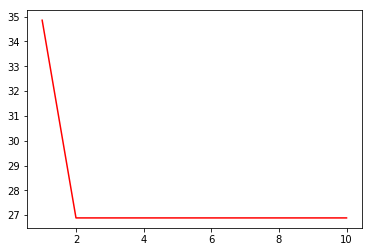

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), sseList, 'r-')
plt.show()

In [35]:
clusterDataset = list()

for j, c in enumerate(cluster):
    dataset = [i for i in range(N) if rnk[i][j]]
    clusterDataset.append(dataset)

In [36]:
voca = list(TWM.keys())

In [37]:
topic = list()

for c in cluster:
    wordList = defaultdict(float)
    for i, w in enumerate(c):
        wordList[voca[i]] = w
        
    topic.append(dict(sorted(wordList.items(), key=lambda x:x[1], reverse = True)[:5]))

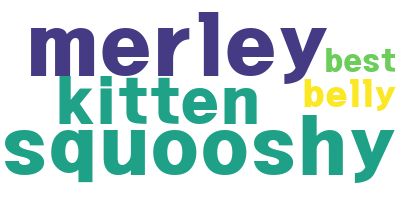

In [39]:
from wordcloud import WordCloud

path = "C:/windows/fonts/HMKMRHD.ttf"
wc = WordCloud(font_path=path, max_words=30, background_color='white')
wc.generate_from_frequencies(topic[0])
wc.to_image()